# Difference-in-Difference Analysis to measure FTA impacts between NAFTA and CUSMA on the Dairy Industry

### Ho Cheng An | Aya Darwash | Bhavya Dubey | Arya Leong

## Introduction:
Free trade agreements are meant to foster greater exchange of goods and services between nations with little to no government tariffs, quotas, subsidies or prohibitions. This is meant to foster greater economic prosperity for both countries however, in the case of the renegotiation of NAFTA to CUSMA, it ended up causing more harm to certain Canadian industries than good. The question that guides our research is to what extent did the changes in policy from NAFTA to CUSMA impact the dairy industry? Our aim is to look at the negative and positive impacts on this industry using difference-in-difference analysis of the dairy and grain industry, 10 years under NAFTA and 4 years under CUSMA.

## Background:

North American Free Trade Agreement (NAFTA) was first drafted and signed in 1994 by Canada, Mexico and the US in an effort to create a North American free trade zone. It resulted in the elimination and reduction of barriers to trade and investment between the three nations, having an overall positive effect on the Northern American economies. After Trump look office in 2017, he sought to replace NAFTA with a new agreement which was named the Canada-United States-Mexico Agreement (CUSMA) which gained greater concessions in Canada markets, particularly that of dairy and poultry products, raising the threshold for tax and duty-free entry into Canada and Mexico of low-value goods imports, and easing other barriers to service trades, and most importantly created more stringent rules of origin for products to qualify for duty-free market access which adversely impacted the automotive sector (Xiao, 2020). Overall CUSMA compared to NAFTA resulted in lower real GDP and welfare for all three parties, with Canada’s GDP shrinking to by 0.4% and economic welfare falling over US$10 billion (Xiao, 2020).

The dairy market is one of those industries that Canada sought to protect. Imports of dairy are controlled via tariff-rate-quotas (TRQ’s) and over-quota ad valorem (percentage) tariffs, at levels that are prohibitive to imports in excess of TRQ. They also used to have subsidized exports of dairy which was abolished in 2021 through the Nairobi Declaration. The significant changes made to the dairy industry from NAFTA to CUSMA are as follows:

Elimination of milk Class 6, and Class 7 within 6 months of the agreement.
Export constraints on skim milk powder and milk protein concentrates, and infant formula.
Phase-out of supply management through elimination of supply control/quotas in dairy, poultry and eggs within 10 years.

Increased dairy market access of 5% per year, leading to open access for the US within 10 years.
Canada’s milk prices at the farm are higher than those in the US, making it difficult to be price-competitive with US products in the US market. In a paper by Biden, Ker, and Duff (2020) they found that there was a 1.4% decrease in the marginal retail price, a 4.8% decrease in blended producer price, and an overall increase in social welfare of 7.8%. The elimination of Class 7 within the CUSMA resulted in a price increase for Canadian producers with respect to the product in Class 7. Ciuriak, Dadkhah, and Xiao (2023) measure the sectoral impacts by reporting on the net bilateral exports and imports within the first year of CUSMA, indicating dairy market displacement and unequal imports and exports. Our paper will focus on the effect of the increased dairy market access through expanding tariff-rate quotas in Canada.

## Data Description, Dataset, and Variables

#### Trade Balance: 
Measured by net imports and exports of all dairy products over the period. This data is sourced from Agriculture Canada and serves as our primary dependent variable to measure the impact of increased market access.
#### Inflation: 
Measured by CPI-common that tracks common price changes across categories in the CPI basket. This data is sourced from the Bank of Canada and is a control variable in our analysis.
#### Exchange Rates: 
Measured by adjusted close and percentage change. This data is sourced from the daily updated Yahoo finance and is to be a control variable in our analysis.
#### Foreign Currency Reserves: 
Measured by the total of Canada’s official international reserves on a monthly frequency between 2010 to 2023. The data is sourced from Statistics Canada and will be a control variable in our analysis.
#### Foreign Direct Investment: 
Measured by the balance of international payments in the total current account. The data is sourced from Statistics Canada and will be a control variable in our analysis.
#### Market Cap/Quotas: 
Measured by the industry revenue of Dairy product manufacturing and industry revenue of Grain product manufacturing. The first variable was sourced from Statista, and the second variable was constructed with the use of total grain yield and average prices from Statistics Canada and Trading Economics.
#### Population: 
Measured by total annual population numbers between 2010 to 2023. Sourced from Statistics Canada and will be a control variable in our analysis.

In [4]:
!pip install statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [5]:
import pandas as pd
import numpy as np
import csv
from zipfile import ZipFile
import io
import requests
import re
import matplotlib.pyplot as plt

### Inflation

In [6]:
#defining the file_path
file_path = 'Datasets_ECON323/Inflation.csv'

# Read in the dataset 
inflation = pd.read_csv(file_path)

#drop columns 
columns_to_drop = ['INDINF_CPI_TRIM_Q', 'INDINF_CPI_MEDIAN_Q', 'INDINF_CPI_Q']
inflation.drop(columns=columns_to_drop, inplace=True)

#drop observations by index
rows_to_drop = inflation.iloc[0:68]
inflation.drop(index=rows_to_drop.index, inplace=True)

# Rename a single column
inflation.rename(columns={'INDINF_CPI_COMMON_Q': 'Inflation (CPI)', 'date':'Year'}, inplace=True)

#need to drop Q1-3 data and retain Q4 data using Boolean indexing    

# Create a boolean mask
mask = (np.arange(len(inflation)) - 3) % 4 == 0

# Apply the mask to keep every 4th row starting from the second
filtered_inflation = inflation[mask]

#print(filtered_inflation)

#need to remove "Q4" and turn the data column into a time object 
#filtered_inflation.loc[:, 'Year'] = filtered_inflation['Year'].str.replace('Q4', '')
filtered_inflation.loc[:,'Year']=pd.to_datetime(filtered_inflation['Year'].str.replace('Q4', ''),format='%Y').dt.year
filtered_inflation = filtered_inflation.set_index('Year')

/tmp/ipykernel_133/3845342808.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_inflation.loc[:,'Year']=pd.to_datetime(filtered_inflation['Year'].str.replace('Q4', ''),format='%Y').dt.year
/tmp/ipykernel_133/3845342808.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_inflation.loc[:,'Year']=pd.to_datetime(filtered_inflation['Year'].str.replace('Q4', ''),format='%Y').dt.year


### Foreign Currency Reserves 

In [7]:
#defining the file_path

file_path = 'Datasets_ECON323/Foreign_Currency_Reserves.csv'

#read in the dataset
FCR = pd.read_csv(file_path) 

#drop irrelevant columns
columns_to_drop_FCR = ['Type of reserve', 'GEO', 'UOM','DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID','VECTOR', 'COORDINATE','STATUS', 'TERMINATED', 'DECIMALS', 'SYMBOL'] 
FCR.drop(columns = columns_to_drop_FCR, inplace = True) 

#dropping the observations with variables that are not of interest using indexes
FCR.drop(index=range(159, 973), inplace=True)

#filter to keep the last month of each year using Boolean indexing 
mask = (np.arange(len(FCR)) - 14) % 12 == 0

# Apply the mask to keep every 12th row starting from the second
filtered_FCR = FCR[mask]

filtered_FCR.loc[:,'REF_DATE']=pd.to_datetime(filtered_FCR['REF_DATE']).dt.year
filtered_FCR = filtered_FCR.rename(columns={'REF_DATE':'Year','VALUE':'CAN Official International Reserves'})
filtered_FCR = filtered_FCR.set_index('Year')

/tmp/ipykernel_133/2883538796.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_FCR.loc[:,'REF_DATE']=pd.to_datetime(filtered_FCR['REF_DATE']).dt.year
/tmp/ipykernel_133/2883538796.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_FCR.loc[:,'REF_DATE']=pd.to_datetime(filtered_FCR['REF_DATE']).dt.year


### Foreign Direct Investment

In [8]:
#defining the file_path
file_path = "Datasets_ECON323/FDI.csv"

#read in the dataset
FDI = pd.read_csv(file_path)

#drop irrelevant columns 
columns_to_drop_FDI = ['GEO', 'UOM','DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID','VECTOR',
                       'COORDINATE','STATUS', 'TERMINATED', 'DECIMALS', 'SYMBOL',
                       'Current account and capital account', 'Countries or regions','Receipts, payments and balances']
FDI.drop(columns = columns_to_drop_FDI, inplace = True)

#dropping the observations with variables that are not of interest using indexes
FDI.drop(index=range(0, 392), inplace=True)
FDI.drop(index=range(406, 588), inplace=True)

#print to check

FDI.loc[:,'REF_DATE']=pd.to_datetime(FDI['REF_DATE'],format='%Y').dt.year
FDI = FDI.rename(columns={'REF_DATE':'Year','VALUE':'FDI Balances'})
FDI = FDI.set_index('Year')

In [9]:
#filtered_FCR
#FDI
#filtered_inflation.head()

### Dairy Industry Supply

In [10]:
file_path = "Datasets_ECON323/dairysupply.csv"
df = pd.read_csv(file_path, parse_dates=["REF_DATE"])

In [11]:
#
df_yearly = df.groupby([df['Supply and disposition'], df['REF_DATE'].dt.year])['VALUE'].sum().reset_index() #sum commodities
df_yearly = df_yearly.rename(columns={"Supply and disposition": "Category", "REF_DATE": "Year", "VALUE":"Value"}) #rename col
df_yearly['Category']=df_yearly['Category'].replace('Supply, total', 'Total Dairy Supply') #rename values
df_yearly = df_yearly.set_index('Year') #index by year

dairy_ind = df_yearly.pivot_table(
    index='Year',
    columns='Category',
    values='Value'
)
dairy_ind = dairy_ind.rename(columns={'Exports':'Total Dairy Exports','Imports':'Total Dairy Imports'})
#dairy_ind.head()

### Grain Industry Supply

In [12]:
file_path = "Datasets_ECON323/grainsupply.csv"
cdf = pd.read_csv(file_path,parse_dates=['REF_DATE'])

In [13]:
#all grains
cdfy = cdf.groupby([cdf['Supply and disposition of grains'], cdf['REF_DATE'].dt.year])['VALUE'].sum().reset_index() 
cdfy = cdfy.rename(columns={"Supply and disposition of grains": "Category", "REF_DATE": "Year", "VALUE":"Value"})
cdfy['Category']=cdfy['Category'].replace({'Imports':'Total Grain Imports', 'Total exports':'Total Grain Exports','Total supplies':'Total Grain Supply'})
cdfy = cdfy.set_index('Year')

grain_ind = cdfy.pivot_table(
    index='Year',
    columns='Category',
    values='Value'
)
#grain_ind.head()

### Exchange rate

In [14]:
file_path = "Datasets_ECON323/CADMXN.csv"
cad_mxn = pd.read_csv(file_path, index_col=0)
file_path = "Datasets_ECON323/CADUSD.csv"
cad_usd = pd.read_csv(file_path, index_col=0)

In [15]:
cad_mxn.reset_index(inplace=True)
cad_usd.reset_index(inplace=True)

In [16]:
cad_mxn['Date'] = pd.to_datetime(cad_mxn['Date'])
cad_mxn = cad_mxn[(cad_mxn['Date'] >= '2010-01-01') & (cad_mxn['Date'] <= '2023-12-31')]

# Resample data annually and calculate the mean
cad_mxn_annual = cad_mxn.resample('A', on='Date').mean()

# Calculate percentage change in exchange rates
cad_mxn_annual['Percentage Change'] = ((cad_mxn_annual['Close'] - cad_mxn_annual['Open']) / cad_mxn_annual['Open']) * 100

#Extract year from index and create a new column
cad_mxn_annual['Year'] = cad_mxn_annual.index.year

#Filter data for the years 2010-2023
cad_mxn_annual = cad_mxn_annual[(cad_mxn_annual.index.year >= 2010) & (cad_mxn_annual.index.year <= 2023)]
cad_mxn_annual = cad_mxn_annual.set_index('Year')
cad_mxn_annual = cad_mxn_annual.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [17]:
cad_usd['Date'] = pd.to_datetime(cad_usd['Date'])
cad_usd = cad_usd[(cad_usd['Date'] >= '2010-01-01') & (cad_usd['Date'] <= '2023-12-31')]

# Resample data annually and calculate the mean
cad_usd_annual = cad_usd.resample('A', on='Date').mean()

#Calculate percentage change in exchange rates 
cad_usd_annual['Percentage Change'] = ((cad_usd_annual['Close'] - cad_usd_annual['Open']) / cad_usd_annual['Open']) * 100

#Extract year from index and create a new column
cad_usd_annual['Year'] = cad_usd_annual.index.year

#Filter data for the years 2010-2023
cad_usd_annual = cad_usd_annual[(cad_usd_annual.index.year >= 2010) & (cad_usd_annual.index.year <= 2023)]
cad_usd_annual = cad_usd_annual.set_index('Year')
cad_usd_annual = cad_usd_annual.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [18]:
merged_ex = cad_mxn_annual.merge(cad_usd_annual, on='Year', suffixes=('_cad_mxn', '_cad_usd'))
#merged_ex = merged_ex.drop(columns=['level_0_cad_mxn','date','level_0_cad_usd','index'])
# Display the merged DataFrame
merged_ex = merged_ex.rename(columns={'Adj Close_cad_mxn':'CAD-MXN EX',
                                      'Percentage Change_cad_mxn':'Percent Change CAD-MXN',
                                      'Adj Close_cad_usd':'CAD-USD EX',
                                      'Percentage Change_cad_usd':'Percent Change CAD-USD'})
#merged_ex

### Revenues

### Dairy Industry

In [19]:
# in billions USD

data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Dairy Product Manufacturing': [10.74, 10.47, 10.74, 10.47, 10.43, 10.30, 11.26, 11.55, 12.22, 12.54, 12.58, 12.89, 13.25, 13.66, 13.91],
    'Ice Cream and Frozen Dessert Manufacturing': [0.53, 0.53, 0.53, 0.53, 0.52, 0.53, 0.53, 0.63, 0.70, 0.74, 0.77, 0.80, 0.84, 0.89, 0.92]
}

# Create a DataFrame
dairy_revenue = pd.DataFrame(data)

# Use backfill to fill in missing values
dairy_revenue = dairy_revenue.bfill()

# Add new rows for the years 2010 and 2011 and fill them using backfill
new_rows = pd.DataFrame({'Year': [2010, 2011], 'Dairy Product Manufacturing': None, 'Ice Cream and Frozen Dessert Manufacturing': None})
dairy_revenue = pd.concat([new_rows, dairy_revenue]).sort_values(by='Year').reset_index(drop=True)
dairy_revenue = dairy_revenue.bfill()

# Sum the values of 'Dairy Product Manufacturing' and 'Ice Cream and Frozen Dessert Manufacturing' columns
dairy_revenue['Dairy Market Value'] = dairy_revenue['Dairy Product Manufacturing'] + dairy_revenue['Ice Cream and Frozen Dessert Manufacturing']

dairy_revenue = dairy_revenue.set_index('Year')
dairy_revenue = dairy_revenue.drop(columns={'Dairy Product Manufacturing','Ice Cream and Frozen Dessert Manufacturing'},index=2024)
dairy_revenue = dairy_revenue[~dairy_revenue.index.duplicated(keep='first')]
#dairy_revenue

### Wheat Industry

In [20]:
file_path = 'Datasets_ECON323/wheat_prod.csv'
wt_prod = pd.read_csv(file_path, low_memory=False, parse_dates=['REF_DATE'])

wt_prod = wt_prod.drop(columns=['GEO', 'DGUID', 'Type of crop', 
                           'Supply and disposition of grains', 'UOM', 
                           'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
                           'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])
wt_prod = wt_prod.groupby(wt_prod['REF_DATE'].dt.year)['VALUE'].sum()
wt_prod = wt_prod.to_frame().reset_index()
wt_prod = wt_prod.rename(columns={'REF_DATE': 'Year',
                                  'VALUE': 'Total Wheat Production'})

file_path = 'Datasets_ECON323/wheat_price.csv'
wt_price = pd.read_csv(file_path, low_memory=False, parse_dates=['date'], dayfirst=True)
# wt_price.info()
wt_price = wt_price.rename(columns={'date': 'Year', ' value': 'Wheat Price'})
wt_price = wt_price.groupby(wt_price['Year'].dt.year)['Wheat Price'].mean()
wt_price = wt_price.to_frame().reset_index()
wt_price = wt_price[wt_price['Year'] > 2009]
# bushel * bushel price 
wt_price['Wheat Price'] = wt_price['Wheat Price'] * 36.7437
wt_rev = pd.merge(wt_prod, wt_price[['Year', 'Wheat Price']], on='Year', how='left')
wt_rev['Grain Market Value'] = wt_rev['Total Wheat Production'] * wt_rev['Wheat Price']
wt_rev = wt_rev.set_index('Year')

wt_rev = wt_rev.drop(columns=['Total Wheat Production', 'Wheat Price'])

#wt_rev

### CAN Pop

In [21]:
file_path = 'Datasets_ECON323/canadapopulation.csv'
ca_pop = pd.read_csv(file_path, low_memory=False)
ca_pop = ca_pop.drop(ca_pop.index[0:3])
ca_pop = ca_pop.drop(columns='World Development Indicators')
ca_pop = ca_pop.T
ca_pop.reset_index(inplace=True)
ca_pop.columns = ca_pop.iloc[0]
ca_pop = ca_pop.drop(ca_pop.index[0:1])
ca_pop = ca_pop.rename(columns={'Data Source': 'Year'})

year_values = ca_pop['Year'].tolist()

year = 1960

for i, value in enumerate(year_values):
    if value.startswith('Unnamed: '):
        year_values[i] = year
        year += 1
        
ca_pop['Year'] = year_values

columns_to_keep = ['Year', 'Canada']
columns_to_drop = [col for col in ca_pop.columns if col not in columns_to_keep]
ca_pop = ca_pop.drop(columns_to_drop, axis=1)
ca_pop = ca_pop.ffill()
ca_pop = ca_pop[ca_pop['Year'] > 2009]
ca_pop.reset_index(inplace=True)
ca_pop = ca_pop.drop(columns='index')

ca_pop = ca_pop.set_index('Year')
ca_pop = ca_pop.rename(columns={'Canada':'CAN Population'})

### CAN GDP

In [22]:
file_path = 'Datasets_ECON323/canadagdp.xls'
ca_gdp = pd.read_excel(file_path)

# Cleaning the dataset
ca_gdp = ca_gdp.drop(columns='World Development Indicators')
ca_gdp = ca_gdp.drop(ca_gdp.index[:3])
ca_gdp = ca_gdp.T
ca_gdp.reset_index(inplace=True)
ca_gdp.columns = ca_gdp.iloc[0]
ca_gdp = ca_gdp.drop(ca_gdp.index[0:3])
ca_gdp = ca_gdp.rename(columns={'Data Source': 'Year'})

# We want to rename the unnamed values in the 'Year' columns to the corresponding years
year = 1960
year_values = ca_gdp['Year'].tolist()

for i, value in enumerate(year_values):
    if value.startswith('Unnamed: '):
        year_values[i] = year
        year += 1
        
ca_gdp['Year'] = year_values

# We want to clean the dataframe so that it only has the 'Year' and 'Canada' columns
columns_to_keep = ['Year', 'Canada']
columns_to_drop = [col for col in ca_gdp.columns if col not in columns_to_keep]

ca_gdp = ca_gdp.drop(columns_to_drop, axis=1)
ca_gdp = ca_gdp[ca_gdp['Year'] > 2009]
ca_gdp.reset_index(inplace=True)
ca_gdp = ca_gdp.drop(columns='index')
ca_gdp = ca_gdp.set_index('Year')
ca_gdp.loc[2023,'Canada']=2145400000000.00000
ca_gdp = ca_gdp.rename(columns={'Canada':'CAN GDP'})
#ca_gdp

# Full Combined

In [23]:
combined_df = pd.concat([ca_pop, ca_gdp, FDI, filtered_FCR, merged_ex, filtered_inflation, dairy_ind, grain_ind, dairy_revenue, wt_rev],axis=1)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2010 to 2023
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CAN Population                       14 non-null     float64
 1   CAN GDP                              14 non-null     object 
 2   FDI Balances                         14 non-null     int64  
 3   CAN Official International Reserves  14 non-null     int64  
 4   CAD-MXN EX                           14 non-null     float64
 5   Percent Change CAD-MXN               14 non-null     float64
 6   CAD-USD EX                           14 non-null     float64
 7   Percent Change CAD-USD               14 non-null     float64
 8   Inflation (CPI)                      14 non-null     float64
 9   Total Dairy Exports                  14 non-null     float64
 10  Total Dairy Imports                  14 non-null     float64
 11  Total Dairy Supply           

## Data Cleaning and Processing

In [71]:
combined_df = pd.concat([ca_pop, ca_gdp, FDI, filtered_FCR, merged_ex, filtered_inflation, dairy_ind, grain_ind, dairy_revenue, wt_rev],axis=1)

# Create Net Export Columns
combined_df['Dairy Net Exports'] = combined_df['Total Dairy Exports'] - combined_df['Total Dairy Imports']
combined_df['Grain Net Exports'] = combined_df['Total Grain Exports'] - combined_df['Total Grain Imports']

# Convert 'CAN GDP' column into a numeric column
combined_df['CAN GDP'] = pd.to_numeric(combined_df['CAN GDP'], errors='coerce')

# Drop columns that causes multicollinearity
combined_df = combined_df.drop(columns=['Total Dairy Exports', 'Total Dairy Imports', 'Total Dairy Supply',
                                        'Total Grain Exports', 'Total Grain Imports', 'Total Grain Supply',
                                        'CAD-MXN EX', 'CAD-USD EX'])

# Reset the index to allow for 'Year' column
combined_df.reset_index(inplace=True)

# Create a 'Post' variable where years before 2020 have value '0' and years 2020 and after have value '1' for DID analysis
combined_df['Post'] = combined_df['Year'].apply(lambda year: 1 if year >= 2020 else 0)
combined_df.head()


# Pivot the dataframe to combine Net Export columns and Market Value columns, with a 'Treatment' column distinguishing between dairy and grain
# Melt the DataFrame to combine 'Dairy Net Exports' and 'Grain Net Exports' together
combined_df = pd.melt(combined_df, 
                      id_vars=['Year', 'CAN Population', 'CAN GDP', 'FDI Balances', 
                               'CAN Official International Reserves',
                               'Percent Change CAD-MXN', 'Percent Change CAD-USD',
                               'Inflation (CPI)', 'Dairy Market Value', 'Grain Market Value', 'Post'], 
                      value_vars=['Dairy Net Exports', 'Grain Net Exports'], 
                      var_name='Treatment', value_name='Net Exports')

# Replace 'Dairy Net Exports' with '1' and 'Grain Net Exports' with '0' in the 'Treatment' column
combined_df['Treatment'] = combined_df['Treatment'].replace('Dairy Net Exports', 1)
combined_df['Treatment'] = combined_df['Treatment'].replace('Grain Net Exports', 0)

# Set 'Dairy Market Value' to '0' where 'Treatment' equals to '0'
combined_df.loc[combined_df['Treatment'] == 0, 'Dairy Market Value'] = 0

# Set 'Grain Market Value' to '0' where 'Treatment' equals to '1'
combined_df.loc[combined_df['Treatment'] == 1, 'Grain Market Value'] = 0

# Combine 'Dairy Market Value' and 'Grain Market Value' columns into 'Market Value' columns
combined_df['Market Value'] = combined_df['Dairy Market Value'] + combined_df['Grain Market Value']

# Drop 'Dairy Market Value' and 'Grain Market Value' columns
combined_df = combined_df.drop(columns=['Dairy Market Value', 'Grain Market Value'])

# 'Post' variable determines before and after treatment, and 'Industry' variable determines control and treatment groups
# Create an interaction term 'Post' multiplied by 'Industry'
combined_df['Interaction Term'] = combined_df['Post'] * combined_df['Treatment']

combined_df = combined_df.set_index('Year')

combined_df

,CAN Population,CAN GDP,FDI Balances,CAN Official International Reserves,Percent Change CAD-MXN,Percent Change CAD-USD,Inflation (CPI),Post,Treatment,Net Exports,Market Value,Interaction Term
Year,,,,,,,,,,,,
2010,34004889.0,1.617343e+12,-59351,57151,-0.029978,0.378777,1.1,0,1,-16173.0,1.127000e+01,0
2011,34339328.0,1.793327e+12,-48112,65819,0.778917,-0.405890,2.0,0,1,-18378.0,1.100000e+01,0
2012,34714222.0,1.828366e+12,-64579,68546,-0.485945,0.244768,1.6,0,1,-14351.0,1.127000e+01,0
2013,35082954.0,1.846597e+12,-59759,71937,-0.340288,-0.598779,1.1,0,1,-7307.0,1.100000e+01,0
2014,35437435.0,1.805750e+12,-46278,74700,0.319983,-0.690286,1.7,0,1,-16748.0,1.095000e+01,0
2015,35702908.0,1.556509e+12,-69569,79753,-0.012515,-1.421982,2.1,0,1,-15331.0,1.083000e+01,0
2016,36109487.0,1.527995e+12,-62553,82718,2.168690,0.316442,1.3,0,1,-17100.0,1.179000e+01,0
2017,36545236.0,1.649266e+12,-59998,86625,-0.056275,0.573924,1.4,0,1,36663.0,1.218000e+01,0
2018,37065084.0,1.725329e+12,-53141,83926,-0.794437,-0.699336,1.8,0,1,23950.0,1.292000e+01,0


## Trends in the Data
#### Exchange Rate: 
Exchange rates are pivotal in global trade, impacting export competitiveness and import costs. The CAD to USD rate fluctuated over the years: it rose from 2010 to 2012, dipped in 2013-2014, and plummeted in 2015. Modest rises occurred in 2016 and 2019, while declines marked 2017, 2018, 2021, and 2022. Slight fluctuations persisted in 2020 and 2023. Similarly, the CAD to MXN rate showed volatility: it surged in 2011 but declined in 2012-2013. Minor changes occurred in 2014 and 2016, with a slight dip in 2015. 2017 saw a moderate decline, whereas significant drops marked 2018 and 2022. A slight decrease was noted in 2019, with modest rises in 2020-2021 followed by substantial declines in 2023. Stable exchange rates are vital for seamless trade, especially under agreements like CUSMA, ensuring mutually beneficial trade relations.

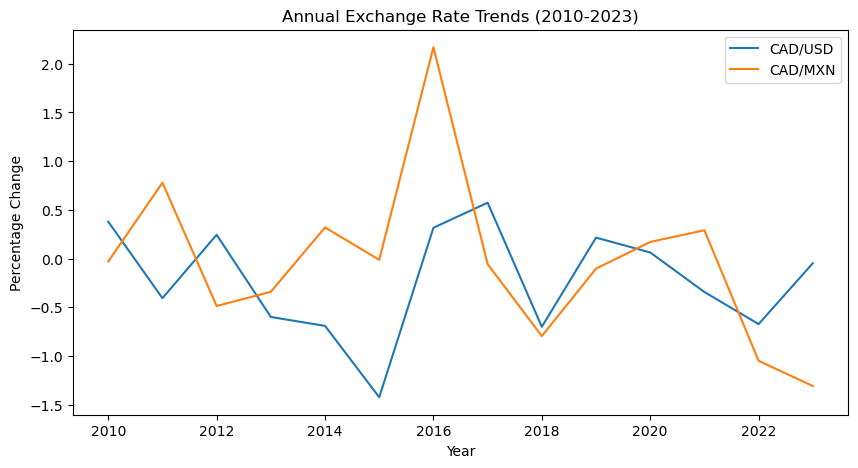

In [96]:
#sort index
combined_df = combined_df.sort_index()

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Plot exchange rate trends for CAD/USD
ax.plot(combined_df['Year'], combined_df['Percent Change CAD-USD'], label='CAD/USD')

# Plot exchange rate trends for CAD/MXN
ax.plot(combined_df['Year'], combined_df['Percent Change CAD-MXN'], label='CAD/MXN')

# Set plot title and labels
ax.set_title('Annual Exchange Rate Trends (2010-2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change')

# Add legend
ax.legend()

# Show plot
plt.show()

#### Import and Export (Quantity): 
Between 2010 and 2023, Canada's grain imports remained stable under NAFTA and CUSMA, contrasting with the dairy industry's consistent rise in imports, marked by spikes in 2015 and a dip in 2017. Grain exports showcased a significant drop in 2021, followed by a recovery in 2022. Meanwhile, dairy exports fluctuated, with an uptick from 2016 to 2017, then a decline post-2017, albeit a slight rise after CUSMA. These trends reflect trade agreement dynamics. NAFTA likely bolstered grain trade, while dairy imports and exports fluctuated due to shifting tariff structures and market conditions. CUSMA's impact was evident in dairy exports, hinting at trade policy adjustments. Overall, stable grain imports suggest a robust market presence, while dairy's mixed performance underscores the industry's sensitivity to trade dynamics. NAFTA and CUSMA shaped trade patterns, highlighting the agricultural sector's resilience amidst evolving trade policies and market conditions.

In [98]:
combined_df['Year'] = combined_df.index # Extracting year from the index

# Fit a polynomial of degree 2
coefficients = np.polyfit(combined_df['Year'], combined_df['Net Exports'], 8)
# Create a polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate x-values (years) from the minimum year to the maximum year
x_values = np.linspace(combined_df['Year'].min(), combined_df['Year'].max(), num=100)
# Calculate y-values using the polynomial function
y_values = polynomial(x_values)

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


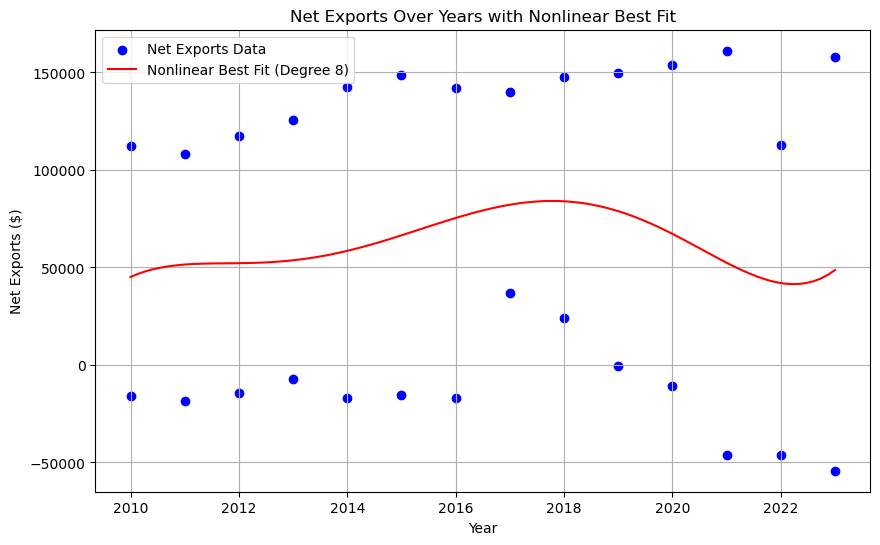

In [99]:
plt.figure(figsize=(10, 6))

# Plot original scatter data
plt.scatter(combined_df['Year'], combined_df['Net Exports'], color='blue', label='Net Exports Data')

# Plot the best fit curve
plt.plot(x_values, y_values, color='red', label='Nonlinear Best Fit (Degree 8)')

plt.title('Net Exports Over Years with Nonlinear Best Fit')
plt.xlabel('Year')
plt.ylabel('Net Exports ($)')
plt.legend()
plt.grid(True)
plt.show()

## Methodology
To evaluate the effect of the revisions in the Tariff Rate Quotas (TRQ) from the NAFTA trade agreement to the CUSMA trade agreement on the production of dairy products in the dairy industry in Canada, an observational study is conducted using empirical data gathered from various online databases.

A linear regression model is constructed with net exports (i.e. exports minus imports) as the dependent variable, and a few variables as the independent variable: (1) exchange rates between USD and CAD (2) Inflation data (3) foreign currency reserves (4) total factor productivity (5) market capitalization (6) GDP (7) population size.

(1) [base model, to use LaTex]

To isolate the effect of the TRQ revision, a difference-in-difference (DID) framework is adopted. A control group that can fulfill the parallel trend test hypothesis is required to utilize the DID framework. This study uses the wheat industry as a control group, as it is an industry with similar characteristics to the dairy industry, which does not have revised TRQs. A dummy variable of the TRQ revision, and also a dummy variable for the treatment group, is included in the regression model as follows:

(2) [base model + DID dummy variables]

Another issue that we have to account for would be the COVID-19 pandemic that happened in 2019, which caused a global recession. Taking this into consideration, a dummy variable for the COVID-19 year is included in the regression model:

(3) [base model + DID dummy variables + COVID dummy variable]

To verify our above specifications are functioning properly, we will perform a Variance Inflation Factor (VIF) test to test for multicollinearity.

#### Assumptions
Accounting for COVID-19- we are assuming that COVID-19 impacted both industries similarly.

## Initial DID regression

In [25]:
import statsmodels.api as sm
from sklearn import linear_model
from scipy import stats

y = combined_df['Net Exports']
X = combined_df.drop(['Net Exports'], axis=1).copy()
X = sm.add_constant(X)

# Fit the regression model
init_lr = sm.OLS(y, X).fit()

# Perform t-tests for each coefficient
print(init_lr.summary())


                            OLS Regression Results                            
Dep. Variable:            Net Exports   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     76.03
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.16e-11
Time:                        23:37:16   Log-Likelihood:                -299.73
No. Observations:                  28   AIC:                             623.5
Df Residuals:                      16   BIC:                             639.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Initial DID regression analysis discussion


The 'Interaction Term' variable is statistically significant, with a coefficient of -44390, suggesting a promising result. However, many other variables are statistically insignificant, with a P-value of more than 0.05. We suspect that multicollinearity might be present. To check for multicollinearity, we conduct a Variance Inflation Factor (VIF) test.

## Variance Inflation Factor (VIF) Test

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Create a dataframe to store VIF results
vif = pd.DataFrame()
vif['Feature'] = X.columns

# Calculate VIF for each feature using list comprehension
vif['VIF'] = [VIF(X.values, i) for i in range(len(X.columns))]

# Renaming specific rows
vif['Feature'] = vif['Feature'].replace({'FDI Balances': 'FDI', 'Percent Change CAD-USD':'CAD-USD', 
                                         'Inflation (CPI)':"Inflation"})

vif['Feature'] = vif['Feature'].replace({'CAN Population': 'Pop','CAN Official International Reserves': 'Reserves',
                                         'Percent Change CAD-MXN': 'CAN-MXN', 'Treatment': 'Treat',
                                        'Market Value': 'Mark_Val', 'Interaction Term': 'Interact'})
vif = vif.set_index('Feature')

#dropping the year to stop the skew in the data to see vif results visually 
vif = vif.drop(vif.index[1])
print(vif)

                 VIF
Feature             
const       0.000000
Pop        18.258876
CAN GDP    34.517545
FDI        10.875887
Reserves   16.101819
CAN-MXN     2.964145
CAD-USD     1.294345
Inflation   4.776825
Post        8.570872
Treat      37.393902
Mark_Val   47.209622
Interact    4.555370


/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


## VIF Visualization

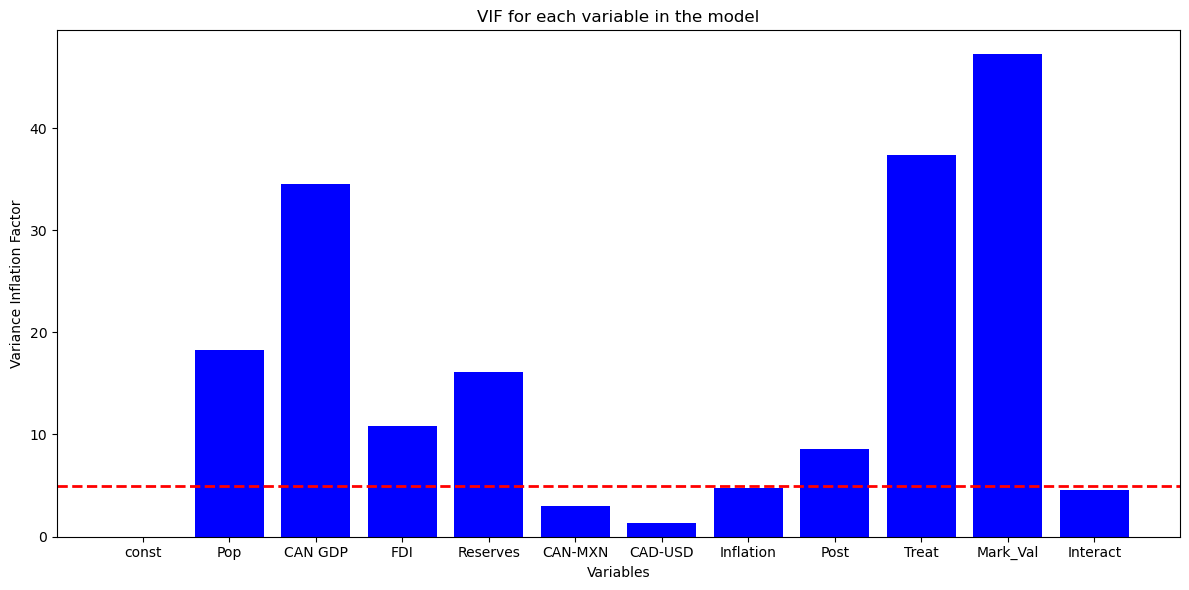

In [69]:
#plotting the VIF diagram 
plt.figure(figsize=(12, 6))

#creating a bar graph 
plt.bar(vif.index, vif['VIF'], color='blue')
plt.xlabel('Variables')
plt.ylabel('Variance Inflation Factor')
plt.title('VIF for each variable in the model')
plt.axhline(5, color='red', linestyle='dashed', linewidth=2)  # Common threshold of VIF
plt.tight_layout()
plt.show()

We can see that the VIF values for `Year`, `CAN Population`, `CAN GDP`, `FDI Balances`, `CAN Official International Reserves`, `Market Value` are above 10, therefore we will remove them.

## Second Round of Data Cleaning and Processing

In [157]:
y2 = combined_df['Net Exports']
X2 = combined_df.drop(['Net Exports', 'Year', 'CAN GDP', 'FDI Balances', 'CAN Official International Reserves', 'Market Value', 'Percent Change CAD-MXN', 'Percent Change CAD-USD'], axis=1).copy()
# 'CAN Population', 
X2 = sm.add_constant(X2)
# Fit the regression model
lr_2 = sm.OLS(y2, X2).fit()

# Perform t-tests for each coefficient
print(lr_2.summary())-

                            OLS Regression Results                            
Dep. Variable:            Net Exports   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     203.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.21e-17
Time:                        23:35:45   Log-Likelihood:                -301.43
No. Observations:                  28   AIC:                             614.9
Df Residuals:                      22   BIC:                             622.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.971e+05   9.41e+04  

We can see that after dropping these variables, only `CAN Population` and `Inflation (CPI)` is statistically significant. This suggests that inflation and the population have the greatest impact on the net exports of the milk industry. 

### Bibliography
Statistics Canada. [Table 32-10-0109-01 Supply and disposition of milk products in Canada]https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210010901
Statistics Canada. [Table 32-10-0013-01 Supply and disposition of grains in Canada (x 1,000)]https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210001301
Senate of Canada. "Agri-Food Economic Systems Brief." Senate of Canada, 2017, https://sencanada.ca/content/sen/committee/421/AGFO/Briefs/Agri-FoodEconomicSystems_Brief_e.pdf.
Global Affairs Canada. "Canada-United States-Mexico Agreement (CUSMA): Text of the Agreement." Global Affairs Canada, Government of Canada, 2020, https://www.international.gc.ca/trade-commerce/trade-agreements-accords-commerciaux/agr-acc/cusma-aceum/text-texte/03.aspx?lang=eng.
Lobosco, Katie, and Donna Borak. "What's in the USMCA Deal That Replaces NAFTA." CNN, Cable News Network, 10 Dec. 2019, www.cnn.com/2019/12/10/politics/nafta-us-mexico-canada-trade-deal-differences/index.html.
"GDP (Current US$) - Canada." World Bank, World Bank Group, 2022, data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2022&locations=CA&start=2017. Accessed 22 Apr. 2024.
"First State-to-State Dispute Under CUSMA on Dairy Quotas: Good News for Distributors and Consumers." Bennett Jones, Bennett Jones LLP, 12 Jan. 2022, https://bennettjones.com/Blogs-Section/First-State-to-State-Dispute-Under-CUSMA-on-Dairy-Quotas-Good-News-for-Distributors-and-Consumers.
Desjardins, Geoffrey Gertz, and Jeffrey J. Schott. "USMCA at 3: Reflecting on Impact and Charting the Future." Brookings, Brookings Institution, 19 July. 2023, https://www.brookings.edu/articles/usmca-at-3-reflecting-on-impact-and-charting-the-future/.
Smith, John. "Which Factors Can Influence a Country's Balance of Trade?" Investopedia, Dotdash Meredith, 15 Apr. 2015, www.investopedia.com/ask/answers/041615/which-factors-can-influence-countrys-balance-trade.asp.
"Trade Balance." Canadian Dairy Information Centre, Agriculture and Agri-Food Canada, no publication date given, https://agriculture.canada.ca/en/sector/animal-industry/canadian-dairy-information-centre/statistics-market-information/trade-balance.
"Inflation." Bank of Canada, Bank of Canada, no publication date given, www.bankofcanada.ca/rates/indicators/capacity-and-inflation-pressures/inflation/.
"Historical Data for CAD/USD Exchange Rates." Yahoo Finance, Yahoo, accessed 22 Apr. 2024, www.finance.yahoo.com/quote/CADUSD%3DX/history?period1=1063670400&period2=1712707200&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true.
"Historical Data for CAD/MXN Exchange Rates." Yahoo Finance, Yahoo, accessed 22 Apr. 2024, https://ca.finance.yahoo.com/quote/CADMXN%3DX/history.
"Table 10-10-0127-01 Employment and Unemployment Rates by Economic Region, Annual (Percentage)." Statistics Canada, Statistics Canada, accessed 22 Apr. 2024, https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1010012701&cubeTimeFrame.startMonth=10&cubeTimeFrame.startYear=2010&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2023&referencePeriods=20101001%2C20231201.
"Table 36-10-0140-01 Canadian International Merchandise Trade by Importer Characteristics, Annual." Statistics Canada, Statistics Canada, accessed 22 Apr. 2024, https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610001401&pickMembers%5B0%5D=4.1&cubeTimeFrame.startYear=2010&cubeTimeFrame.endYear=2023&referencePeriods=20100101%2C20230101.
"Components of Summary Education Indicators for Canada, Provinces and Territories, 2006 to 2014." Statistics Canada, Statistics Canada, 2014, www150.statcan.gc.ca/n1/pub/91-215-x/2014000/t002-eng.htm. Accessed 22 Apr. 2024.
Government of Canada, Statistics Canada. “Annual Demographic Estimates: Canada, Provinces and Territories, 2018 (Total Population Only) Table 1.1-1 Annual Population Estimates, July 1, Canada, Provinces and Territories - Population.” Table 1.1-1 Annual Population Estimates, July 1, Canada, Provinces and Territories - Population, 27 Sept. 2018, www150.statcan.gc.ca/n1/pub/91-215-x/2018001/tbl/tbl1.1-1-eng.htm. 
Government of Canada, Statistics Canada. “Annual Demographic Estimates: Canada, Provinces and Territories, 2022 Table 1.1-1 Annual Population Estimates, July 1, Canada, Provinces and Territories - Population.” Table 1.1-1 Annual Population Estimates, July 1, Canada, Provinces and Territories - Population, 28 Sept. 2022, www150.statcan.gc.ca/n1/pub/91-215-x/2022001/tbl/tbl1.1-1-eng.htm. 
“Population Estimates, Quarterly.” Population Estimates, Quarterly, Government of Canada, Statistics Canada, 27 Mar. 2024, www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901. 

